In [1]:
1
!pip install bs4

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [3]:
URL='https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&ref_=adv_prv'

In [4]:
# a = requests.get(Url,headers={'User-Agent':'Mozilla/5.0'})

In [5]:
page = requests.get(URL)

In [6]:
html_code=page.text

In [7]:
## Format the HTML code using bs4 library
soup = BeautifulSoup(html_code)

In [8]:
page.status_code

200

In [9]:
# Format the HTML code using bs4 library

soup = BeautifulSoup(html_code)

## find()

In [10]:
name = soup.find('h3', attrs={'class' : 'lister-item-header'})

print(name.text)


1.
The Dark Knight
(2008)



In [11]:
duration = soup.find('span', attrs={'class':'runtime'})

print(duration.text)

152 min


In [12]:
movie_type = soup.find('span',attrs={'class':'genre'})

print(movie_type.text)


Action, Crime, Drama            


In [13]:
rating = soup.find('div',attrs={'class':'inline-block ratings-imdb-rating'})

print(rating.text)



9.0



In [14]:
meta_score = soup.find('div',attrs={'class':'inline-block ratings-metascore'})

print(meta_score.text)



84        
        Metascore
            


In [15]:
vote = soup.find('p',attrs={'class':'sort-num_votes-visible'})

print(vote.text)


Votes:
2,451,362
| Gross:
$534.86M



In [16]:
director = soup.find('p',attrs={'class':''})

print(director.text)


    Director:
Christopher Nolan
| 
    Stars:
Christian Bale, 
Heath Ledger, 
Aaron Eckhart, 
Michael Caine



In [17]:
# Scrapping the Web Page

name = []
duration = []
movie_type= []
rating = []
meta=[]
vote=[]
director=[]

for i in range(1,1000,50):
    URL = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=action&sort=user_rating,desc&start={}ref_=adv_prv'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : 'lister-item mode-advanced'}):

        names = x.find('h3', attrs={'class' : 'lister-item-header'})

        if names is None:
            name.append(np.NaN)
        else:
            name.append(names.text)

        durations = x.find('span', attrs={'class':'runtime'})
        if durations is None:
            duration.append(np.NaN)
        else:
            duration.append(durations.text)

        movie_types = x.find('span',attrs={'class':'genre'})
        if movie_types is None:
            movie_type.append(np.NaN)
        else:
            movie_type.append(movie_types.text)

        ratings = x.find('div',attrs={'class':'inline-block ratings-imdb-rating'})
        if ratings is None:
            rating.append(np.NaN)
        else:
            rating.append(ratings.text)           
            
            meta_scores = x.find('div',attrs={'class':'inline-block ratings-metascore'})
        if meta_scores is None:
            meta.append(np.NaN)
        else:
            meta.append(meta_scores.text)
            
            votes = x.find('p',attrs={'class':'sort-num_votes-visible'})
        if votes is None:
            vote.append(np.NaN)
        else:
            vote.append(votes.text)
            
            directors = x.find('p',attrs={'class':''})
        if directors is None:
            director.append(np.NaN)
        else:
             director.append( directors.text)


In [18]:
print(len(name))
print(len(duration))
print(len(movie_type))
print(len(rating))
print(len(meta))
print(len(vote))
print(len(director))

1000
1000
1000
1000
1000
1000
1000


## Create a DataFrame and save it in CSV file

In [19]:
df = pd.DataFrame({'MovieName' : name, 'Duration' : duration, 'MovieType' : movie_type, 'Rating' : rating, 'Metascore':meta, 'Votes':vote, 'Directors':director})

In [20]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors
0,\n1.\nThe Dark Knight\n(2008)\n,152 min,"\nAction, Crime, Drama",\n\n9.0\n,\n84 \n Metascore\n,"\nVotes:\n2,451,362\n| Gross:\n$534.86M\n",\n Director:\nChristopher Nolan\n| \n St...
1,\n2.\nThe Lord of the Rings: The Return of the...,201 min,"\nAction, Adventure, Drama",\n\n8.9\n,\n94 \n Metascore\n,"\nVotes:\n1,728,401\n| Gross:\n$377.85M\n",\n Director:\nPeter Jackson\n| \n Stars:...
2,\n3.\nInception\n(2010)\n,148 min,"\nAction, Adventure, Sci-Fi",\n\n8.8\n,\n74 \n Metascore\n,"\nVotes:\n2,199,693\n| Gross:\n$292.58M\n",\n Director:\nChristopher Nolan\n| \n St...
3,\n4.\nThe Lord of the Rings: The Fellowship of...,178 min,"\nAction, Adventure, Drama",\n\n8.8\n,\n92 \n Metascore\n,"\nVotes:\n1,749,681\n| Gross:\n$315.54M\n",\n Director:\nPeter Jackson\n| \n Stars:...
4,\n5.\nDag II\n(2016)\n,135 min,"\nAction, Drama, War",\n\n8.7\n,NaN,"\nVotes:\n1,749,681\n| Gross:\n$315.54M\n",\n Director:\nAlper Caglar\n| \n Stars:\...


In [21]:
df.shape

(1000, 7)

In [22]:
df.tail()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors
995,\n46.\nSherlock Jr.\n(1924)\n,45 min,"\nAction, Comedy, Romance",\n\n8.2\n,NaN,"\nVotes:\n118,355\n",\n Director:\nBuster Keaton\n| \n Stars:...
996,\n47.\nKaththi\n(2014)\n,166 min,"\nAction, Drama",\n\n8.1\n,NaN,"\nVotes:\n118,355\n",\n Director:\nA.R. Murugadoss\n| \n Star...
997,\n48.\nHaider\n(2014)\n,160 min,"\nAction, Crime, Drama",\n\n8.1\n,NaN,"\nVotes:\n118,355\n",\n Director:\nVishal Bhardwaj\n| \n Star...
998,\n49.\nLogan\n(2017)\n,137 min,"\nAction, Drama, Sci-Fi",\n\n8.1\n,\n77 \n Metascore\n,"\nVotes:\n699,601\n| Gross:\n$226.28M\n",\n Director:\nJames Mangold\n| \n Stars:...
999,\n50.\n1 - Nenokkadine\n(2014)\n,170 min,"\nAction, Thriller",\n\n8.1\n,NaN,"\nVotes:\n699,601\n| Gross:\n$226.28M\n",\n Director:\nSukumar\n| \n Stars:\nMahe...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieName  1000 non-null   object
 1   Duration   1000 non-null   object
 2   MovieType  1000 non-null   object
 3   Rating     1000 non-null   object
 4   Metascore  700 non-null    object
 5   Votes      1000 non-null   object
 6   Directors  1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [24]:
df.to_csv('Movie_Details.csv', index = False)

## Extracting the Details using Regex

In [25]:
import numpy as np
import pandas as pd

import re

In [26]:
df = pd.read_csv("Movie_Details.csv")

df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors
0,\n1.\nThe Dark Knight\n(2008)\n,152 min,"\nAction, Crime, Drama",9.0,\n84 \n Metascore\n,"\nVotes:\n2,451,362\n| Gross:\n$534.86M\n",\n Director:\nChristopher Nolan\n| \n St...
1,\n2.\nThe Lord of the Rings: The Return of the...,201 min,"\nAction, Adventure, Drama",8.9,\n94 \n Metascore\n,"\nVotes:\n1,728,401\n| Gross:\n$377.85M\n",\n Director:\nPeter Jackson\n| \n Stars:...
2,\n3.\nInception\n(2010)\n,148 min,"\nAction, Adventure, Sci-Fi",8.8,\n74 \n Metascore\n,"\nVotes:\n2,199,693\n| Gross:\n$292.58M\n",\n Director:\nChristopher Nolan\n| \n St...
3,\n4.\nThe Lord of the Rings: The Fellowship of...,178 min,"\nAction, Adventure, Drama",8.8,\n92 \n Metascore\n,"\nVotes:\n1,749,681\n| Gross:\n$315.54M\n",\n Director:\nPeter Jackson\n| \n Stars:...
4,\n5.\nDag II\n(2016)\n,135 min,"\nAction, Drama, War",8.7,NaN,"\nVotes:\n1,749,681\n| Gross:\n$315.54M\n",\n Director:\nAlper Caglar\n| \n Stars:\...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MovieName  1000 non-null   object 
 1   Duration   1000 non-null   object 
 2   MovieType  1000 non-null   object 
 3   Rating     1000 non-null   float64
 4   Metascore  700 non-null    object 
 5   Votes      1000 non-null   object 
 6   Directors  1000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 54.8+ KB


In [28]:
df['MovieName'] = df.MovieName.apply(lambda x : x.replace('\n', ''))
df['MovieType']=df.MovieType.apply(lambda x : x.replace('\n',''))
df['Metascore']=df.Metascore.fillna(0).astype(str).apply(lambda x : x.replace('\n',''))
df['Votes']=df.Votes.apply(lambda x : x.replace('\n',''))
df['Directors']=df.Directors.apply(lambda x : x.replace('\n',''))

In [29]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,84 Metascore,"Votes:2,451,362| Gross:$534.86M",Director:Christopher Nolan| Stars:Chri...
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,94 Metascore,"Votes:1,728,401| Gross:$377.85M",Director:Peter Jackson| Stars:Elijah W...
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,74 Metascore,"Votes:2,199,693| Gross:$292.58M",Director:Christopher Nolan| Stars:Leon...
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,92 Metascore,"Votes:1,749,681| Gross:$315.54M",Director:Peter Jackson| Stars:Elijah W...
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,0,"Votes:1,749,681| Gross:$315.54M",Director:Alper Caglar| Stars:Caglar Er...


In [30]:

regex = r'[^A-Za-z\s:,.^\d]+[\d]+'

df['Year'] = df['MovieName'].apply(lambda x : re.findall(regex, x))

In [31]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors,Year
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,84 Metascore,"Votes:2,451,362| Gross:$534.86M",Director:Christopher Nolan| Stars:Chri...,[(2008]
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,94 Metascore,"Votes:1,728,401| Gross:$377.85M",Director:Peter Jackson| Stars:Elijah W...,[(2003]
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,74 Metascore,"Votes:2,199,693| Gross:$292.58M",Director:Christopher Nolan| Stars:Leon...,[(2010]
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,92 Metascore,"Votes:1,749,681| Gross:$315.54M",Director:Peter Jackson| Stars:Elijah W...,[(2001]
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,0,"Votes:1,749,681| Gross:$315.54M",Director:Alper Caglar| Stars:Caglar Er...,[(2016]


In [32]:

regex = r'\d+'

df['Metascore'] = df['Metascore'].apply(lambda x : re.findall(regex, str(x))) 

In [33]:
df['Metascore']

0      [84]
1      [94]
2      [74]
3      [92]
4       [0]
       ... 
995     [0]
996     [0]
997     [0]
998    [77]
999     [0]
Name: Metascore, Length: 1000, dtype: object

In [34]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors,Year
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],"Votes:2,451,362| Gross:$534.86M",Director:Christopher Nolan| Stars:Chri...,[(2008]
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],"Votes:1,728,401| Gross:$377.85M",Director:Peter Jackson| Stars:Elijah W...,[(2003]
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],"Votes:2,199,693| Gross:$292.58M",Director:Christopher Nolan| Stars:Leon...,[(2010]
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],"Votes:1,749,681| Gross:$315.54M",Director:Peter Jackson| Stars:Elijah W...,[(2001]
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],"Votes:1,749,681| Gross:$315.54M",Director:Alper Caglar| Stars:Caglar Er...,[(2016]


In [35]:
df['Votes']

0      Votes:2,451,362| Gross:$534.86M
1      Votes:1,728,401| Gross:$377.85M
2      Votes:2,199,693| Gross:$292.58M
3      Votes:1,749,681| Gross:$315.54M
4      Votes:1,749,681| Gross:$315.54M
                    ...               
995                      Votes:118,355
996                      Votes:118,355
997                      Votes:118,355
998      Votes:699,601| Gross:$226.28M
999      Votes:699,601| Gross:$226.28M
Name: Votes, Length: 1000, dtype: object

In [36]:
vote = []
for i in df['Votes']:
    vote.append(i.split('|')[0].split(':')[1])
#print(vote)

In [37]:
df['No of Votes'] = vote
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors,Year,No of Votes
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],"Votes:2,451,362| Gross:$534.86M",Director:Christopher Nolan| Stars:Chri...,[(2008],"2,451,362"
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],"Votes:1,728,401| Gross:$377.85M",Director:Peter Jackson| Stars:Elijah W...,[(2003],"1,728,401"
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],"Votes:2,199,693| Gross:$292.58M",Director:Christopher Nolan| Stars:Leon...,[(2010],"2,199,693"
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],"Votes:1,749,681| Gross:$315.54M",Director:Peter Jackson| Stars:Elijah W...,[(2001],"1,749,681"
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],"Votes:1,749,681| Gross:$315.54M",Director:Alper Caglar| Stars:Caglar Er...,[(2016],"1,749,681"


In [38]:
regex = r'\$(\w.*)'

df['Gross in $million'] = df['Votes'].apply(lambda x : re.findall(regex, str(x))) 

In [39]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Votes,Directors,Year,No of Votes,Gross in $million
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],"Votes:2,451,362| Gross:$534.86M",Director:Christopher Nolan| Stars:Chri...,[(2008],"2,451,362",[534.86M]
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],"Votes:1,728,401| Gross:$377.85M",Director:Peter Jackson| Stars:Elijah W...,[(2003],"1,728,401",[377.85M]
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],"Votes:2,199,693| Gross:$292.58M",Director:Christopher Nolan| Stars:Leon...,[(2010],"2,199,693",[292.58M]
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],"Votes:1,749,681| Gross:$315.54M",Director:Peter Jackson| Stars:Elijah W...,[(2001],"1,749,681",[315.54M]
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],"Votes:1,749,681| Gross:$315.54M",Director:Alper Caglar| Stars:Caglar Er...,[(2016],"1,749,681",[315.54M]


In [40]:
df = df.drop ('Votes',axis=1)

In [41]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Directors,Year,No of Votes,Gross in $million
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],Director:Christopher Nolan| Stars:Chri...,[(2008],"2,451,362",[534.86M]
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],Director:Peter Jackson| Stars:Elijah W...,[(2003],"1,728,401",[377.85M]
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],Director:Christopher Nolan| Stars:Leon...,[(2010],"2,199,693",[292.58M]
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],Director:Peter Jackson| Stars:Elijah W...,[(2001],"1,749,681",[315.54M]
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],Director:Alper Caglar| Stars:Caglar Er...,[(2016],"1,749,681",[315.54M]


In [42]:
df['Directors'][0].split('|')[1].split(':')[1]


'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine'

In [43]:
df['Directors'][0].split('|')[1]

'     Stars:Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine'

In [44]:
Direct = []
for i in df['Directors']:
    Direct.append(i.split('|')[1].split(':')[1])

In [45]:
df['Stars']=Direct

df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Directors,Year,No of Votes,Gross in $million,Stars
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],Director:Christopher Nolan| Stars:Chri...,[(2008],"2,451,362",[534.86M],"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],Director:Peter Jackson| Stars:Elijah W...,[(2003],"1,728,401",[377.85M],"Elijah Wood, Viggo Mortensen, Ian McKellen, Or..."
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],Director:Christopher Nolan| Stars:Leon...,[(2010],"2,199,693",[292.58M],"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],Director:Peter Jackson| Stars:Elijah W...,[(2001],"1,749,681",[315.54M],"Elijah Wood, Ian McKellen, Orlando Bloom, Sean..."
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],Director:Alper Caglar| Stars:Caglar Er...,[(2016],"1,749,681",[315.54M],"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe..."


In [46]:
Direct = []
for i in df['Directors']:
    Direct.append(i.split('|')[0].split(':')[1])

In [47]:
df['Director']=Direct

df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Directors,Year,No of Votes,Gross in $million,Stars,Director
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],Director:Christopher Nolan| Stars:Chri...,[(2008],"2,451,362",[534.86M],"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],Director:Peter Jackson| Stars:Elijah W...,[(2003],"1,728,401",[377.85M],"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],Director:Christopher Nolan| Stars:Leon...,[(2010],"2,199,693",[292.58M],"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],Director:Peter Jackson| Stars:Elijah W...,[(2001],"1,749,681",[315.54M],"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],Director:Alper Caglar| Stars:Caglar Er...,[(2016],"1,749,681",[315.54M],"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar


In [48]:
df = df.drop ('Directors',axis=1)

In [49]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],[(2008],"2,451,362",[534.86M],"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],[(2003],"1,728,401",[377.85M],"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],[(2010],"2,199,693",[292.58M],"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],[(2001],"1,749,681",[315.54M],"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],[(2016],"1,749,681",[315.54M],"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar


In [50]:

regex = r'\d+'

df['Timing'] = df['Duration'].apply(lambda x : re.findall(regex, str(x))) 

In [51]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,[84],[(2008],"2,451,362",[534.86M],"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,[152]
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,[94],[(2003],"1,728,401",[377.85M],"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,[201]
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,[74],[(2010],"2,199,693",[292.58M],"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,[148]
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,[92],[(2001],"1,749,681",[315.54M],"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,[178]
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,[0],[(2016],"1,749,681",[315.54M],"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,[135]


# # Cleaning the Data


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MovieName          1000 non-null   object 
 1   Duration           1000 non-null   object 
 2   MovieType          1000 non-null   object 
 3   Rating             1000 non-null   float64
 4   Metascore          1000 non-null   object 
 5   Year               1000 non-null   object 
 6   No of Votes        1000 non-null   object 
 7   Gross in $million  1000 non-null   object 
 8   Stars              1000 non-null   object 
 9   Director           1000 non-null   object 
 10  Timing             1000 non-null   object 
dtypes: float64(1), object(10)
memory usage: 86.1+ KB


In [53]:
# Missing Values

df.isnull().sum()

MovieName            0
Duration             0
MovieType            0
Rating               0
Metascore            0
Year                 0
No of Votes          0
Gross in $million    0
Stars                0
Director             0
Timing               0
dtype: int64

In [54]:
print(df['Metascore'][0])

print(type(df['Metascore'][0]))

['84']
<class 'list'>


In [55]:
print(''.join(df['Metascore'][0]))
print(type(''.join(df['Metascore'][0])))

84
<class 'str'>


In [56]:
df.Metascore = df.Metascore.apply(lambda x : ''.join(x))
df.Year= df.Year.apply(lambda x : ''.join(x))
df['Gross in $million'] = df['Gross in $million'].apply(lambda x : ''.join(x))
df.Timing= df.Timing.apply(lambda x : ''.join(x))

In [57]:
df.head()

,MovieName,Duration,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing
0,1.The Dark Knight(2008),152 min,"Action, Crime, Drama",9.0,84,(2008,"2,451,362",534.86M,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152
1,2.The Lord of the Rings: The Return of the Kin...,201 min,"Action, Adventure, Drama",8.9,94,(2003,"1,728,401",377.85M,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201
2,3.Inception(2010),148 min,"Action, Adventure, Sci-Fi",8.8,74,(2010,"2,199,693",292.58M,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148
3,4.The Lord of the Rings: The Fellowship of the...,178 min,"Action, Adventure, Drama",8.8,92,(2001,"1,749,681",315.54M,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178
4,5.Dag II(2016),135 min,"Action, Drama, War",8.7,0,(2016,"1,749,681",315.54M,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135


In [58]:
df = df.drop ('Duration',axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MovieName          1000 non-null   object 
 1   MovieType          1000 non-null   object 
 2   Rating             1000 non-null   float64
 3   Metascore          1000 non-null   object 
 4   Year               1000 non-null   object 
 5   No of Votes        1000 non-null   object 
 6   Gross in $million  1000 non-null   object 
 7   Stars              1000 non-null   object 
 8   Director           1000 non-null   object 
 9   Timing             1000 non-null   object 
dtypes: float64(1), object(9)
memory usage: 78.2+ KB


In [60]:
df.Year = df.Year.apply(lambda x : x.replace('(', ''))

In [61]:
df.head()

,MovieName,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing
0,1.The Dark Knight(2008),"Action, Crime, Drama",9.0,84,2008,"2,451,362",534.86M,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152
1,2.The Lord of the Rings: The Return of the Kin...,"Action, Adventure, Drama",8.9,94,2003,"1,728,401",377.85M,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201
2,3.Inception(2010),"Action, Adventure, Sci-Fi",8.8,74,2010,"2,199,693",292.58M,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148
3,4.The Lord of the Rings: The Fellowship of the...,"Action, Adventure, Drama",8.8,92,2001,"1,749,681",315.54M,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178
4,5.Dag II(2016),"Action, Drama, War",8.7,0,2016,"1,749,681",315.54M,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135


In [62]:
df['Gross in $million'] = df['Gross in $million'].apply(lambda x : x.replace('M', ''))

In [63]:
df.head()

,MovieName,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing
0,1.The Dark Knight(2008),"Action, Crime, Drama",9.0,84,2008,"2,451,362",534.86,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152
1,2.The Lord of the Rings: The Return of the Kin...,"Action, Adventure, Drama",8.9,94,2003,"1,728,401",377.85,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201
2,3.Inception(2010),"Action, Adventure, Sci-Fi",8.8,74,2010,"2,199,693",292.58,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148
3,4.The Lord of the Rings: The Fellowship of the...,"Action, Adventure, Drama",8.8,92,2001,"1,749,681",315.54,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178
4,5.Dag II(2016),"Action, Drama, War",8.7,0,2016,"1,749,681",315.54,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135


In [64]:
df['No of Votes'] = df['No of Votes'].apply(lambda x : x.replace(',', ''))

In [65]:
df.head()

,MovieName,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing
0,1.The Dark Knight(2008),"Action, Crime, Drama",9.0,84,2008,2451362,534.86,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152
1,2.The Lord of the Rings: The Return of the Kin...,"Action, Adventure, Drama",8.9,94,2003,1728401,377.85,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201
2,3.Inception(2010),"Action, Adventure, Sci-Fi",8.8,74,2010,2199693,292.58,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148
3,4.The Lord of the Rings: The Fellowship of the...,"Action, Adventure, Drama",8.8,92,2001,1749681,315.54,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178
4,5.Dag II(2016),"Action, Drama, War",8.7,0,2016,1749681,315.54,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135


In [66]:
movie=[]
for  i in df['MovieName']:
    movie.append(i.split(".")[1].split("(")[0])

In [67]:
df['Movie']= movie
df.head()

,MovieName,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing,Movie
0,1.The Dark Knight(2008),"Action, Crime, Drama",9.0,84,2008,2451362,534.86,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152,The Dark Knight
1,2.The Lord of the Rings: The Return of the Kin...,"Action, Adventure, Drama",8.9,94,2003,1728401,377.85,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201,The Lord of the Rings: The Return of the King
2,3.Inception(2010),"Action, Adventure, Sci-Fi",8.8,74,2010,2199693,292.58,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148,Inception
3,4.The Lord of the Rings: The Fellowship of the...,"Action, Adventure, Drama",8.8,92,2001,1749681,315.54,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178,The Lord of the Rings: The Fellowship of the Ring
4,5.Dag II(2016),"Action, Drama, War",8.7,0,2016,1749681,315.54,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135,Dag II


In [68]:
df.head()

,MovieName,MovieType,Rating,Metascore,Year,No of Votes,Gross in $million,Stars,Director,Timing,Movie
0,1.The Dark Knight(2008),"Action, Crime, Drama",9.0,84,2008,2451362,534.86,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christopher Nolan,152,The Dark Knight
1,2.The Lord of the Rings: The Return of the Kin...,"Action, Adventure, Drama",8.9,94,2003,1728401,377.85,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",Peter Jackson,201,The Lord of the Rings: The Return of the King
2,3.Inception(2010),"Action, Adventure, Sci-Fi",8.8,74,2010,2199693,292.58,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Christopher Nolan,148,Inception
3,4.The Lord of the Rings: The Fellowship of the...,"Action, Adventure, Drama",8.8,92,2001,1749681,315.54,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",Peter Jackson,178,The Lord of the Rings: The Fellowship of the Ring
4,5.Dag II(2016),"Action, Drama, War",8.7,0,2016,1749681,315.54,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",Alper Caglar,135,Dag II


In [69]:
df=df[['Movie','MovieType','Director','Stars','Gross in $million','Year','No of Votes','Rating','Metascore','Timing']]

In [70]:
df.head()

,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362,9.0,84,152
1,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,2003,1728401,8.9,94,201
2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693,8.8,74,148
3,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,2001,1749681,8.8,92,178
4,Dag II,"Action, Drama, War",Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",315.54,2016,1749681,8.7,0,135


In [71]:
df.to_csv('temp.csv')

In [72]:
data = pd.read_csv('temp.csv')

In [73]:
data.head()

,Unnamed: 0,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362,9.0,84,152
1,1,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,2003,1728401,8.9,94,201
2,2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693,8.8,74,148
3,3,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,2001,1749681,8.8,92,178
4,4,Dag II,"Action, Drama, War",Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",315.54,2016,1749681,8.7,0,135


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   Movie              1000 non-null   object 
 2   MovieType          1000 non-null   object 
 3   Director           1000 non-null   object 
 4   Stars              1000 non-null   object 
 5   Gross in $million  840 non-null    float64
 6   Year               1000 non-null   object 
 7   No of Votes        1000 non-null   int64  
 8   Rating             1000 non-null   float64
 9   Metascore          1000 non-null   int64  
 10  Timing             1000 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [75]:
df = data.copy()
df.head()

,Unnamed: 0,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362,9.0,84,152
1,1,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,2003,1728401,8.9,94,201
2,2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693,8.8,74,148
3,3,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,2001,1749681,8.8,92,178
4,4,Dag II,"Action, Drama, War",Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",315.54,2016,1749681,8.7,0,135


In [76]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [77]:
df.head()

,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362,9.0,84,152
1,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,2003,1728401,8.9,94,201
2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693,8.8,74,148
3,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,2001,1749681,8.8,92,178
4,Dag II,"Action, Drama, War",Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",315.54,2016,1749681,8.7,0,135


In [78]:
df['Movie'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Movie, Length: 1000, dtype: bool

In [79]:
df['MovieType'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: MovieType, Length: 1000, dtype: bool

In [80]:
df['Director'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Director, Length: 1000, dtype: bool

In [81]:
df['Stars'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Stars, Length: 1000, dtype: bool

In [82]:
df['Gross in $million'].isnull().sum()

160

In [83]:
df['Gross in $million'] = df['Gross in $million'].replace({'': np.nan})



In [84]:
df['Gross in $million']

0      534.86
1      377.85
2      292.58
3      315.54
4      315.54
        ...  
995       NaN
996       NaN
997       NaN
998    226.28
999    226.28
Name: Gross in $million, Length: 1000, dtype: float64

In [85]:
df['Year'].astype(float)

ValueError: could not convert string to float: 'ô1961'

In [86]:
df['Year'].apply(lambda x : (int(x.replace('ô', '')) if 'ô' in x else int(x)))

0      2008
1      2003
2      2010
3      2001
4      2016
       ... 
995    1924
996    2014
997    2014
998    2017
999    2014
Name: Year, Length: 1000, dtype: int64

In [87]:
df['Year']=df['Year'].apply(lambda x : (int(x.replace('ô', '')) if 'ô' in x else int(x)))

In [88]:
df['Year'].astype(float)

0      2008.0
1      2003.0
2      2010.0
3      2001.0
4      2016.0
        ...  
995    1924.0
996    2014.0
997    2014.0
998    2017.0
999    2014.0
Name: Year, Length: 1000, dtype: float64

In [89]:
df['No of Votes'].astype(float)
df['No of Votes']=df['No of Votes'].astype(float)
df['No of Votes']

0      2451362.0
1      1728401.0
2      2199693.0
3      1749681.0
4      1749681.0
         ...    
995     118355.0
996     118355.0
997     118355.0
998     699601.0
999     699601.0
Name: No of Votes, Length: 1000, dtype: float64

In [90]:
df['Rating'].astype(float)
df['Rating']=df['Rating'].astype(float)
df['Rating']

0      9.0
1      8.9
2      8.8
3      8.8
4      8.7
      ... 
995    8.2
996    8.1
997    8.1
998    8.1
999    8.1
Name: Rating, Length: 1000, dtype: float64

In [91]:
df['Metascore'].astype(float)
df['Metascore']=df['Metascore'].astype(float)
df['Metascore']

0      84.0
1      94.0
2      74.0
3      92.0
4       0.0
       ... 
995     0.0
996     0.0
997     0.0
998    77.0
999     0.0
Name: Metascore, Length: 1000, dtype: float64

In [92]:
df['Timing'].astype(float)
df['Timing']=df['Timing'].astype(float)
df['Timing']

0      152.0
1      201.0
2      148.0
3      178.0
4      135.0
       ...  
995     45.0
996    166.0
997    160.0
998    137.0
999    170.0
Name: Timing, Length: 1000, dtype: float64

In [93]:
df

,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
1,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",377.85,2003,1728401.0,8.9,94.0,201.0
2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693.0,8.8,74.0,148.0
3,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",Peter Jackson,"Elijah Wood, Ian McKellen, Orlando Bloom, Sean...",315.54,2001,1749681.0,8.8,92.0,178.0
4,Dag II,"Action, Drama, War",Alper Caglar,"Caglar Ertugrul, Ufuk Bayraktar, Ahu Türkpençe...",315.54,2016,1749681.0,8.7,0.0,135.0
...,...,...,...,...,...,...,...,...,...,...
995,Sherlock Jr,"Action, Comedy, Romance",Buster Keaton,"Buster Keaton, Kathryn McGuire, Joe Keaton, Er...",NaN,1924,118355.0,8.2,0.0,45.0
996,Kaththi,"Action, Drama",A.R. Murugadoss,"Joseph Vijay, Samantha Ruth Prabhu, Neil Nitin...",NaN,2014,118355.0,8.1,0.0,166.0
997,Haider,"Action, Crime, Drama",Vishal Bhardwaj,"Shahid Kapoor, Tabu, Shraddha Kapoor, Kay Kay ...",NaN,2014,118355.0,8.1,0.0,160.0
998,Logan,"Action, Drama, Sci-Fi",James Mangold,"Hugh Jackman, Patrick Stewart, Dafne Keen, Boy...",226.28,2017,699601.0,8.1,77.0,137.0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie              1000 non-null   object 
 1   MovieType          1000 non-null   object 
 2   Director           1000 non-null   object 
 3   Stars              1000 non-null   object 
 4   Gross in $million  840 non-null    float64
 5   Year               1000 non-null   int64  
 6   No of Votes        1000 non-null   float64
 7   Rating             1000 non-null   float64
 8   Metascore          1000 non-null   float64
 9   Timing             1000 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 78.2+ KB


# Basic Plotting with matplotlib

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Visualization
## Univariate Analysis
## Histogram
##### Analysing the distribution of whole data

array([[<AxesSubplot:title={'center':'Gross in $million'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'No of Votes'}>,
        <AxesSubplot:title={'center':'Rating'}>],
       [<AxesSubplot:title={'center':'Metascore'}>,
        <AxesSubplot:title={'center':'Timing'}>]], dtype=object)

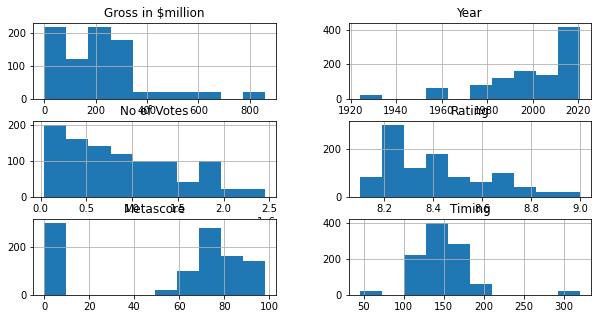

In [114]:
df.hist(["Gross in $million","Year","No of Votes","Rating","Metascore","Timing"], figsize=(10,5))

# Analysis
From the above histogram we can infer the following:

1. Gross in $million distribution is highly right skewed and maximum profit distributed between 0-300                    
2. Year is also Left skewed and maximum average year Movies released  between 2000-2020                                 
3. No of Votes is right skewed and maximum                                                                          
4. Rating distribution is highly right skewed                                                                          
     From the graph, we see there aren’t many records of movies released before 1980. It’s better to remove those records because they might not be representative.


# Box Plot

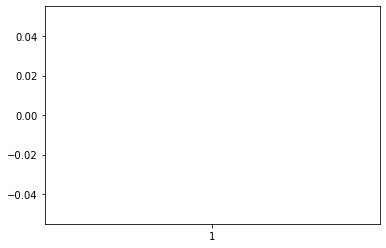

In [117]:
plt.boxplot(df['Gross in $million'])
plt.show()

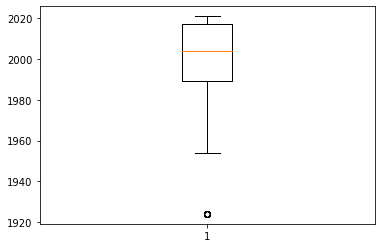

In [118]:
plt.boxplot(df['Year'])
plt.show()

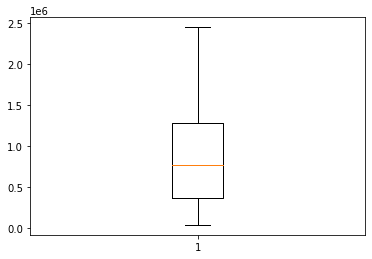

In [119]:
plt.boxplot(df['No of Votes'])
plt.show()

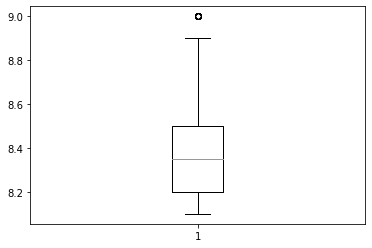

In [123]:
plt.boxplot(df['Rating'])
plt.show()

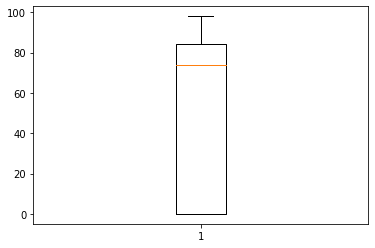

In [121]:
plt.boxplot(df['Metascore'])
plt.show()

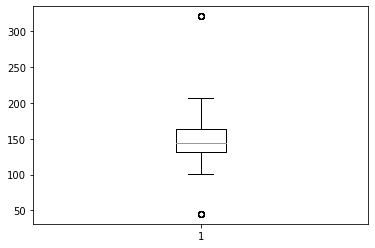

In [122]:
plt.boxplot(df['Timing'])
plt.show()

In [116]:
df['Director'].value_counts()

Christopher Nolan                                80
Akira Kurosawa                                   60
Peter Jackson                                    60
Anthony Russo, Joe Russo                         40
Steven Spielberg                                 40
James Cameron                                    40
John McTiernan                                   20
Bob Persichetti, Peter Ramsey, Rodney Rothman    20
Sukumar                                          20
Gayatri, Pushkar                                 20
Ramesh Sippy                                     20
Ram Kumar                                        20
Prashanth Neel                                   20
Tigmanshu Dhulia                                 20
Michael Mann                                     20
Priyadarshan                                     20
Richard Marquand                                 20
Vishal Bhardwaj                                  20
Buster Keaton                                    20
Irvin Kershn

In [98]:
Director =df[df["Director"]=='Christopher Nolan']

Director

,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693.0,8.8,74.0,148.0
21,The Dark Knight Rises,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",448.14,2012,1595575.0,8.4,78.0,164.0
36,Batman Begins,"Action, Crime",Christopher Nolan,"Christian Bale, Michael Caine, Ken Watanabe, L...",206.85,2005,1374258.0,8.2,70.0,140.0
50,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
...,...,...,...,...,...,...,...,...,...,...
936,Batman Begins,"Action, Crime",Christopher Nolan,"Christian Bale, Michael Caine, Ken Watanabe, L...",206.85,2005,1374258.0,8.2,70.0,140.0
950,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
952,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693.0,8.8,74.0,148.0
971,The Dark Knight Rises,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",448.14,2012,1595575.0,8.4,78.0,164.0


Text(0.5, 1.0, 'Christopher Nolan Movies')

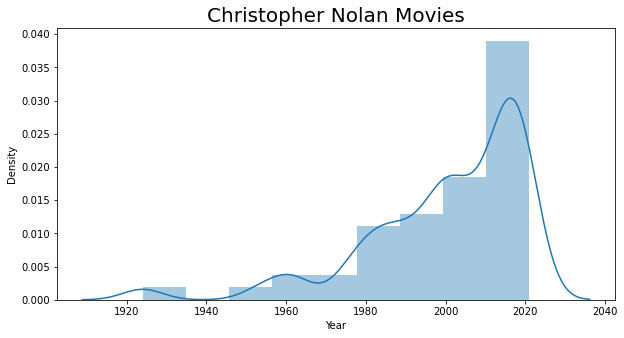

In [99]:
plt.figure(figsize=(10,5))
sns.distplot(df['Year'],bins=9)
plt.title("Christopher Nolan Movies", size=20)

# Draw the different Univariate plots for All the Categorical variables in the Dataset

### Bar plot

<AxesSubplot:>

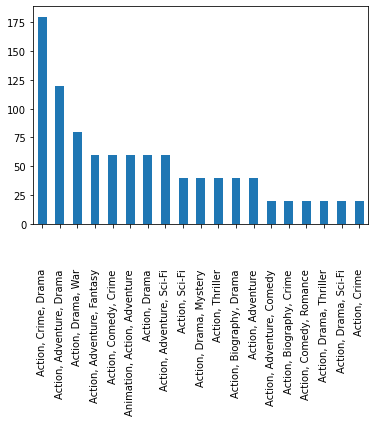

In [100]:
df['MovieType'].value_counts().plot.bar()


<AxesSubplot:>

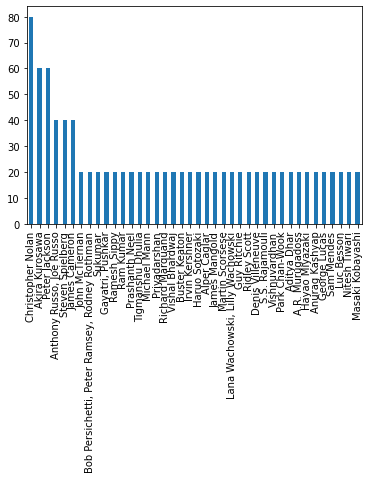

In [101]:
df['Director'].value_counts().plot.bar()


<AxesSubplot:title={'center':'Movie rating over years'}, xlabel='Year'>

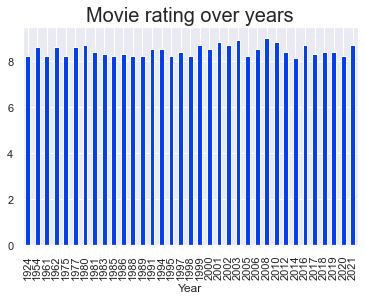

In [141]:
Max_profit=df.groupby(["Year"])["Rating"].max().plot.bar()
plt.title("Movie rating over years",size=20)
Max_profit

<AxesSubplot:title={'center':'Maximum Gross'}, xlabel='MovieType'>

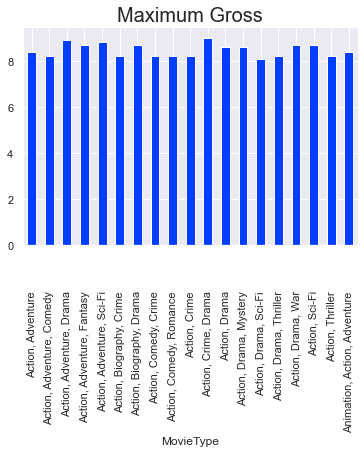

In [149]:
Max_profit=df.groupby(["MovieType"])["Rating"].max().plot.bar()
plt.title("Maximum Gross",size=20)
Max_profit

<AxesSubplot:title={'center':'Maximum Gross'}, xlabel='Year'>

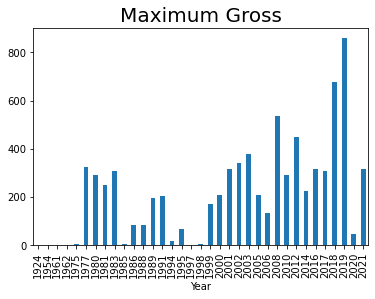

In [106]:
Max_profit=df.groupby(["Year"])["Gross in $million"].max().plot.bar()
plt.title("Maximum Gross",size=20)
Max_profit

<AxesSubplot:xlabel='Movie', ylabel='Director'>

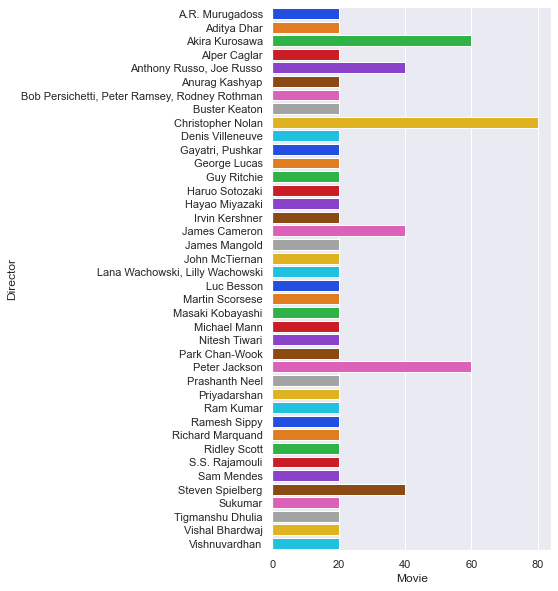

In [138]:

sns.set(palette='bright')
plt.figure(figsize=[5,10])
df.groupby('Director').count()
sns.barplot(y=df.groupby('Director').count().index, x='Movie', data=df.groupby('Director').count(), orient='h', palette='bright')

#  Bivariate Analysis (for Numerical Variables)

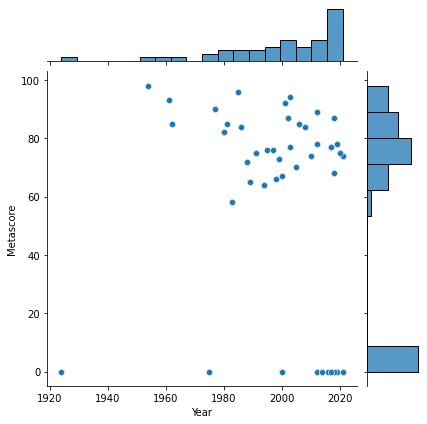

In [1872]:
sns.jointplot(x='Year', y='Metascore', data=df, kind = 'scatter')

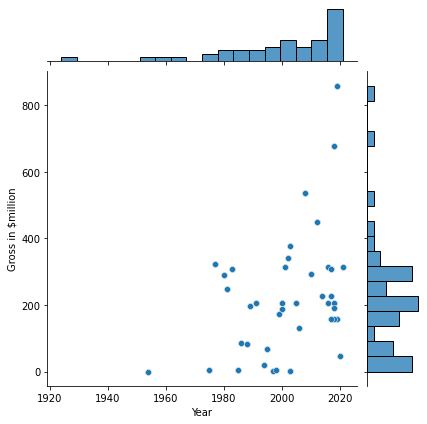

In [1873]:
sns.jointplot(x='Year', y='Gross in $million', data=df, kind = 'scatter')

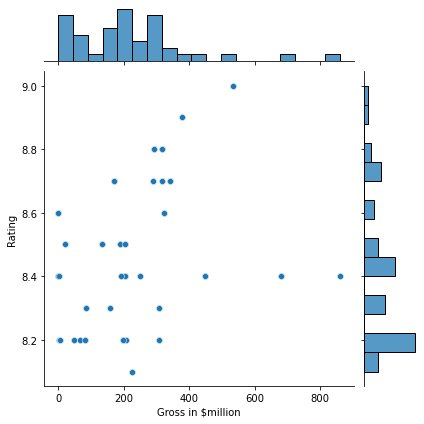

In [125]:
sns.jointplot(x='Gross in $million', y='Rating', data=df, kind = 'scatter')

# Scatter Plot

<AxesSubplot:xlabel='Gross in $million', ylabel='MovieType'>

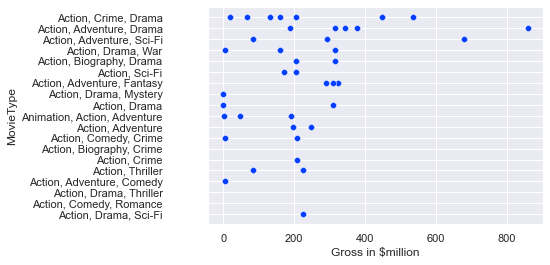

In [147]:
sns.scatterplot(x='Gross in $million', y='MovieType', data=df)

<AxesSubplot:xlabel='Timing', ylabel='MovieType'>

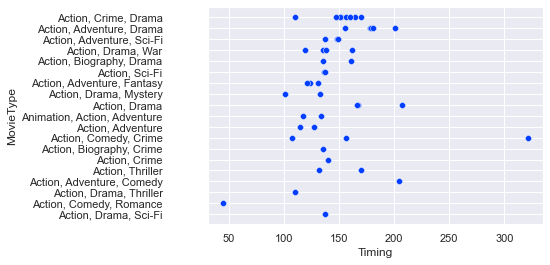

In [151]:
sns.scatterplot(x='Timing', y='MovieType', data=df)

# Strip Plot

<AxesSubplot:xlabel='MovieType', ylabel='Gross in $million'>

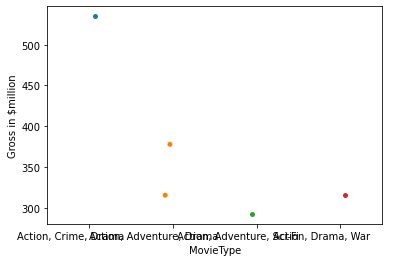

In [111]:
sns.stripplot(data = df.iloc[:5,:], x = 'MovieType', y='Gross in $million')

# Swarn Plot 

<AxesSubplot:xlabel='Director', ylabel='Gross in $million'>

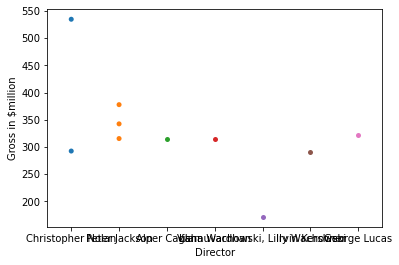

In [129]:
sns.swarmplot(data = df.iloc[:10,:], x = 'Director', y='Gross in $million')

# HeatPlot

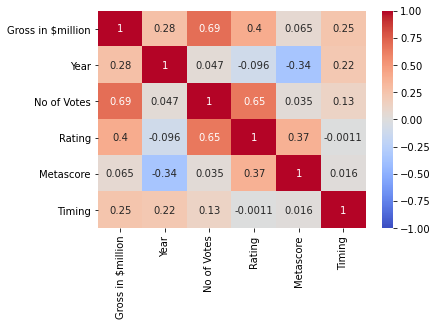

In [124]:
sns.heatmap(df.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

## Ditribution plot combines the histogram and kernel density plot                                                   
* It shows the distribution of  Christopher Nolan released movies released in which year
* The more numbers of movies released is left skewed and most movies released between  2000 to 2020

# Bivariate Analysis
### Bargraph

<AxesSubplot:title={'center':'Maximum Gross'}, xlabel='Year'>

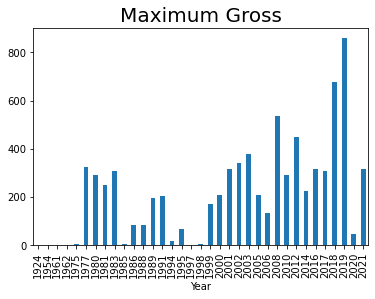

In [1853]:
Max_profit=df.groupby(["Year"])["Gross in $million"].max().plot.bar()
plt.title("Maximum Gross",size=20)
Max_profit

### Observations                                                                                           
The above bar graph shows maximum earnings in IMDB

Year 2019 has max score and 1998 has minimum score

# BOX Plot
Comparing top directors 1920 to 2021

In [1854]:
df["Director"].value_counts()

Christopher Nolan                                80
Peter Jackson                                    60
Akira Kurosawa                                   60
James Cameron                                    40
Steven Spielberg                                 40
Anthony Russo, Joe Russo                         40
Ridley Scott                                     20
Denis Villeneuve                                 20
Irvin Kershner                                   20
Ramesh Sippy                                     20
S.S. Rajamouli                                   20
James Mangold                                    20
John McTiernan                                   20
Sam Mendes                                       20
Luc Besson                                       20
Vishal Bhardwaj                                  20
Alper Caglar                                     20
Park Chan-Wook                                   20
Michael Mann                                     20
Richard Marq

In [131]:
a=df.loc[df.Director == 'Christopher Nolan']
b=df.loc[df.Director == 'Peter Jackson']
c=df.loc[df.Director=='Akira Kurosawa']
d=df.loc[df.Director=='Steven Spielberg']
top_Director =pd.concat([a,b,c,d])
top_Director


,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
0,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
2,Inception,"Action, Adventure, Sci-Fi",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",292.58,2010,2199693.0,8.8,74.0,148.0
21,The Dark Knight Rises,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...",448.14,2012,1595575.0,8.4,78.0,164.0
36,Batman Begins,"Action, Crime",Christopher Nolan,"Christian Bale, Michael Caine, Ken Watanabe, L...",206.85,2005,1374258.0,8.2,70.0,140.0
50,The Dark Knight,"Action, Crime, Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",534.86,2008,2451362.0,9.0,84.0,152.0
...,...,...,...,...,...,...,...,...,...,...
890,Indiana Jones and the Last Crusade,"Action, Adventure",Steven Spielberg,"Harrison Ford, Sean Connery, Alison Doody, Den...",197.17,1989,723333.0,8.2,65.0,127.0
924,Raiders of the Lost Ark,"Action, Adventure",Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, John...",248.16,1981,924684.0,8.4,85.0,115.0
940,Indiana Jones and the Last Crusade,"Action, Adventure",Steven Spielberg,"Harrison Ford, Sean Connery, Alison Doody, Den...",197.17,1989,723333.0,8.2,65.0,127.0
974,Raiders of the Lost Ark,"Action, Adventure",Steven Spielberg,"Harrison Ford, Karen Allen, Paul Freeman, John...",248.16,1981,924684.0,8.4,85.0,115.0


## Comparing the runs of top directors box office earnings 1920 to 2021

In [132]:
top_Director[top_Director.Director=='Akira Kurosawa']

,Movie,MovieType,Director,Stars,Gross in $million,Year,No of Votes,Rating,Metascore,Timing
11,Shichinin no samurai,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",0.27,1954,331971.0,8.6,98.0,207.0
42,Ran,"Action, Drama, War",Akira Kurosawa,"Tatsuya Nakadai, Akira Terao, Jinpachi Nezu, D...",4.14,1985,120597.0,8.2,96.0,162.0
44,Yôjinbô,"Action, Drama, Thriller",Akira Kurosawa,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ...",NaN,1961,118355.0,8.2,93.0,110.0
61,Shichinin no samurai,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",0.27,1954,331971.0,8.6,98.0,207.0
92,Ran,"Action, Drama, War",Akira Kurosawa,"Tatsuya Nakadai, Akira Terao, Jinpachi Nezu, D...",4.14,1985,120597.0,8.2,96.0,162.0
94,Yôjinbô,"Action, Drama, Thriller",Akira Kurosawa,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ...",NaN,1961,118355.0,8.2,93.0,110.0
111,Shichinin no samurai,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",0.27,1954,331971.0,8.6,98.0,207.0
142,Ran,"Action, Drama, War",Akira Kurosawa,"Tatsuya Nakadai, Akira Terao, Jinpachi Nezu, D...",4.14,1985,120597.0,8.2,96.0,162.0
144,Yôjinbô,"Action, Drama, Thriller",Akira Kurosawa,"Toshirô Mifune, Eijirô Tôno, Tatsuya Nakadai, ...",NaN,1961,118355.0,8.2,93.0,110.0
161,Shichinin no samurai,"Action, Drama",Akira Kurosawa,"Toshirô Mifune, Takashi Shimura, Keiko Tsushim...",0.27,1954,331971.0,8.6,98.0,207.0


Text(0.5, 1.0, 'Comparing the runs of top directors box office earnings 1920 to 2021')

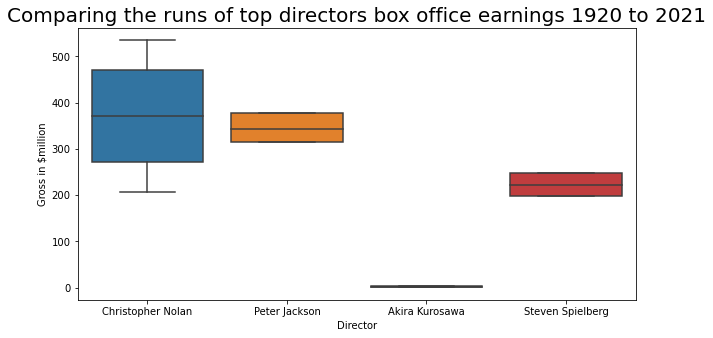

In [133]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Director",y="Gross in $million",data=top_Director)
plt.title("Comparing the runs of top directors box office earnings 1920 to 2021",size=20)

### Observations
Box plot gives the 3 point summary of data                                                                              

Min Gross by the directors                                                                                    
Max gross by the directors                                                                                         
Q1-25th percentile
Q2-75th percentile
Median Value                                                       

Christopher Nolan has the max  Gross compared to all 200 to 500 doller millions .                                           
Peter Jackson                                                                                    
Akira Kurosawa

<AxesSubplot:xlabel='Movie', ylabel='Director'>

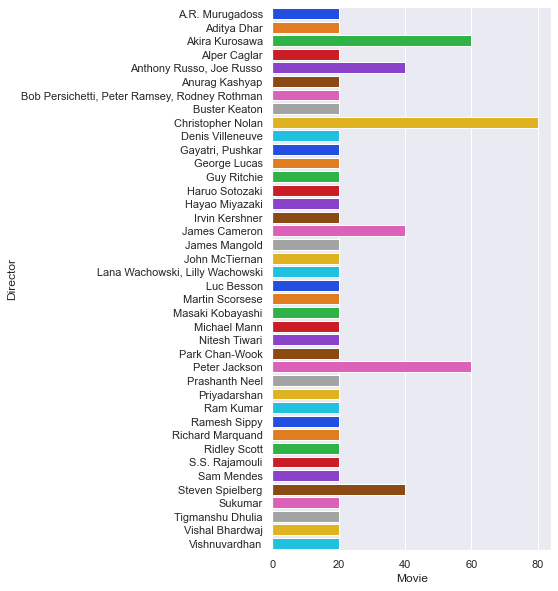

In [136]:

sns.set(palette='bright')
plt.figure(figsize=[5,10])
df.groupby('Director').count()
sns.barplot(y=df.groupby('Director').count().index, x='Movie', data=df.groupby('Director').count(), orient='h', palette='bright')